In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

En el caso de Madrid tenía casos para toda la CC.AA., pero en realidad sólo necesito para el municipio de Madrid. Por tanto importo la geometría del municipio y filtro sólo las observaciones que están en él. 

In [2]:
amb=pd.read_excel('G:/Mi unidad/Documentos personales/9-Documentos Doctorado/Doctorado 2023/11-Web scrapping/data/a-amb-marzo24.xlsx')
mad=pd.read_excel('G:/Mi unidad/Documentos personales/9-Documentos Doctorado/Doctorado 2023/11-Web scrapping/data/a-prov_mad-marzo24.xlsx')

#Le creo un ID
mad.reset_index(drop=True, inplace=True)
mad.index = mad.index + 1
mad.insert(0, 'ID', mad.index)

# Convertir el DataFrame a un GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(mad['Lon_X'], mad['Lat_Y'])]
crs = 'epsg:4326'  # Definir sistema de coordenadas WGS84
gdf_puntos = gpd.GeoDataFrame(mad, crs=crs, geometry=geometry)
gdf_puntos = gdf_puntos.to_crs(epsg=32631)

geomad=gpd.read_file('G:/Mi unidad/Datos/españa/vectores/MUNICIPOS-ESPAÑA-31N.gpkg')
geomad=geomad[geomad['NAMEUNIT']=='Madrid']

munmad = gpd.sjoin(gdf_puntos, geomad[['geometry']], how='inner', predicate='intersects')
munmad=munmad.drop(['geometry','index_right'],axis=1)

In [3]:
print(len(mad))
print(len(munmad))

2405
1983


Creo una columna que me indique los quintiles a los que pertenece cada observación.

In [4]:
# Creas una nueva columna en cada DataFrame con los quintiles
amb['qprecio'] = pd.qcut(amb['precio_euros'], 5, labels=False)
munmad['qprecio'] = pd.qcut(munmad['precio_euros'], 5, labels=False)

In [5]:
len(amb)

2417

In [6]:
print(amb['qprecio'].unique())
print(munmad['qprecio'].unique())

[0 1 2 3 4]
[0 1 4 2 3]


In [7]:
print(len(amb[amb['qprecio']==0]))
print(len(amb[amb['qprecio']==1]))
print(len(amb[amb['qprecio']==2]))
print(len(amb[amb['qprecio']==3]))
print(len(amb[amb['qprecio']==4]))

517
467
468
489
476


In [26]:
muestra_amb = pd.DataFrame()

# Iterar sobre cada quintil
for quintil in range(5):  # Los quintiles van de 0 a 4
    # Filtrar el DataFrame para obtener solo las observaciones que pertenecen al quintil actual
    quintil_actual = munmad[munmad['qprecio'] == quintil]

    # Calcular el tamaño de la muestra para un nivel de confianza del 95%
    Z = 1.96  # Para un nivel de confianza del 95%
    p = 0.5   # Valor medio para maximizar el tamaño de la muestra
    e = 0.05  # Margen de error del 5%
    n = int((Z**2 * p * (1-p)) / e**2)  # Calcular el tamaño de la muestra
    
    # Verificar si el tamaño de la muestra es mayor que el número de observaciones en el quintil actual
    if n > len(quintil_actual):
        # Si es así, ajustar el tamaño de la muestra
        n = len(quintil_actual)
    
    # Obtener una muestra aleatoria del quintil actual
    muestra_actual = quintil_actual.sample(n, replace=False)
    
    # Agregar la muestra al DataFrame de muestras
    muestra_amb = pd.concat([muestra_amb, muestra_actual])

In [27]:
len(muestra_amb)

1859

In [28]:
print(len(muestra_amb[muestra_amb['qprecio']==0]))
print(len(muestra_amb[muestra_amb['qprecio']==1]))
print(len(muestra_amb[muestra_amb['qprecio']==2]))
print(len(muestra_amb[muestra_amb['qprecio']==3]))
print(len(muestra_amb[muestra_amb['qprecio']==4]))

384
338
384
369
384


In [25]:
print(len(amb[amb['qprecio']==0]))
print(len(amb[amb['qprecio']==1]))
print(len(amb[amb['qprecio']==2]))
print(len(amb[amb['qprecio']==3]))
print(len(amb[amb['qprecio']==4]))

517
467
468
489
476


Calculo la muestra aleatoria.

In [20]:
muestra_munmad = pd.DataFrame()

# Iterar sobre cada quintil
for quintil in range(5):  # Los quintiles van de 0 a 4
    # Filtrar el DataFrame para obtener solo las observaciones que pertenecen al quintil actual
    quintil_actual = munmad[munmad['qprecio'] == quintil]

    # Calcular el tamaño de la muestra para un nivel de confianza del 95%
    Z = 1.96  # Para un nivel de confianza del 95%
    p = 0.5   # Valor medio para maximizar el tamaño de la muestra
    e = 0.05  # Margen de error del 5%
    n = int((Z**2 * p * (1-p)) / e**2)  # Calcular el tamaño de la muestra
    
    # Verificar si el tamaño de la muestra es mayor que el número de observaciones en el quintil actual
    if n > len(quintil_actual):
        # Si es así, ajustar el tamaño de la muestra
        n = len(quintil_actual)
    
    # Obtener una muestra aleatoria del quintil actual
    muestra_actual = quintil_actual.sample(n, replace=False)
    
    # Agregar la muestra al DataFrame de muestras
    muestra_munmad = pd.concat([muestra_munmad, muestra_actual])

In [23]:
print(len(muestra_munmad[muestra_munmad['qprecio']==0]))
print(len(muestra_munmad[muestra_munmad['qprecio']==1]))
print(len(muestra_munmad[muestra_munmad['qprecio']==2]))
print(len(muestra_munmad[muestra_munmad['qprecio']==3]))
print(len(muestra_munmad[muestra_munmad['qprecio']==4]))

384
338
384
369
384


In [24]:
print(len(munmad[munmad['qprecio']==0]))
print(len(munmad[munmad['qprecio']==1]))
print(len(munmad[munmad['qprecio']==2]))
print(len(munmad[munmad['qprecio']==3]))
print(len(munmad[munmad['qprecio']==4]))

455
338
424
369
397


Reviso la distribución tanto de los datos originales como de la muestra.

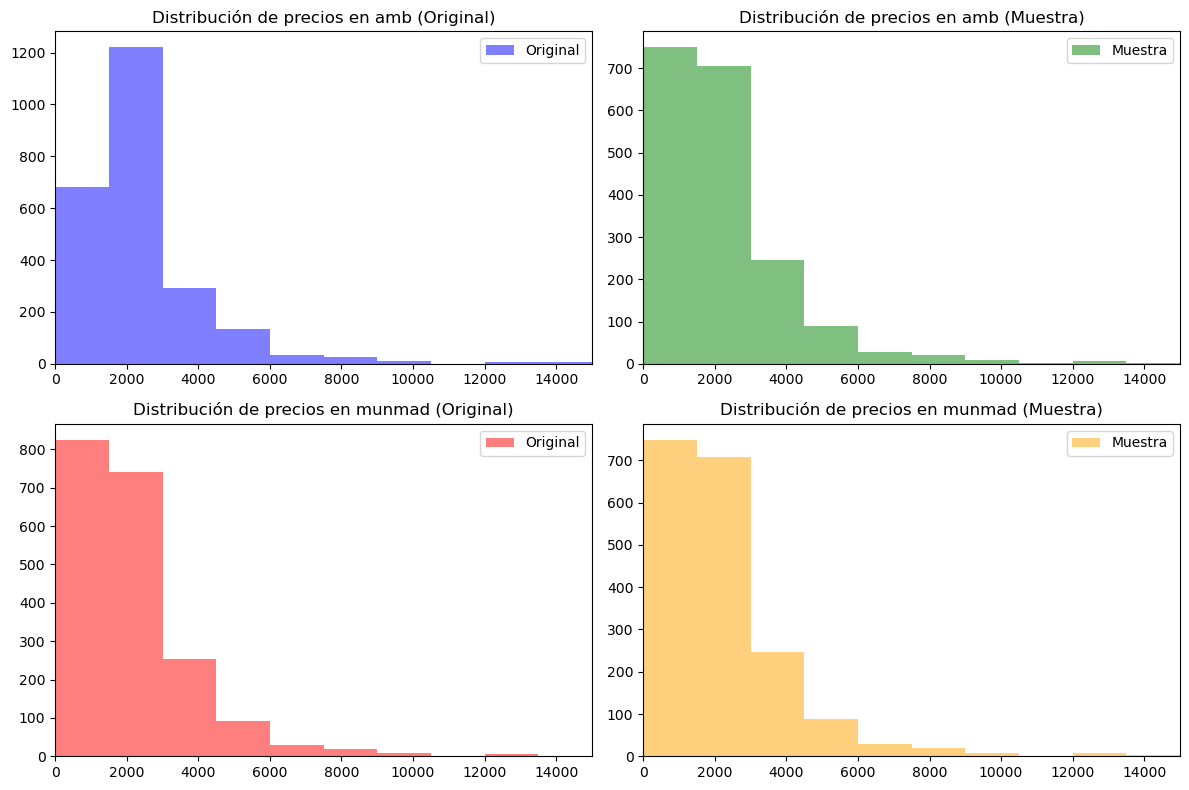

In [29]:
# Crear subgráficos para mostrar los histogramas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Definir los límites y la separación del eje x
x_min = 0
x_max = 15000
bin_width = 1500
num_bins = int((x_max - x_min) / bin_width)

# Histograma de los datos originales de amb
axs[0, 0].hist(amb['precio_euros'], bins=np.arange(x_min, x_max + bin_width, bin_width), color='blue', alpha=0.5, label='Original')
axs[0, 0].set_title('Distribución de precios en amb (Original)')
axs[0, 0].legend()

# Histograma de los datos de la muestra de amb
axs[0, 1].hist(muestra_amb['precio_euros'], bins=np.arange(x_min, x_max + bin_width, bin_width), color='green', alpha=0.5, label='Muestra')
axs[0, 1].set_title('Distribución de precios en amb (Muestra)')
axs[0, 1].legend()

# Histograma de los datos originales de munmad
axs[1, 0].hist(munmad['precio_euros'], bins=np.arange(x_min, x_max + bin_width, bin_width), color='red', alpha=0.5, label='Original')
axs[1, 0].set_title('Distribución de precios en munmad (Original)')
axs[1, 0].legend()

# Histograma de los datos de la muestra de munmad
axs[1, 1].hist(muestra_munmad['precio_euros'], bins=np.arange(x_min, x_max + bin_width, bin_width), color='orange', alpha=0.5, label='Muestra')
axs[1, 1].set_title('Distribución de precios en munmad (Muestra)')
axs[1, 1].legend()

# Ajustar los límites del eje x
for ax in axs.flat:
    ax.set_xlim(x_min, x_max)

plt.tight_layout()
plt.show()

In [9]:
print(muestra_amb.columns.tolist())
print(muestra_munmad.columns.tolist())

['ID', 'Title', 'Link', 'precio_euros', 'codigo_inmueble', 'Description', 'last_mod', 'dummy_indice', 'indice_alquiler', 'area', 'n_rooms', 'price_m2', 'n_baths', 'n_aseo', 'laundry', 'buhardilla', 'despacho', 'trastero', 'terrace', 'kwhm2_year', 'kgCO2m2_year', 'dummy_consum_EPC', 'dummy_emission_EPC', 'consum_A', 'consum_B', 'consum_C', 'consum_D', 'consum_E', 'consum_F', 'consum_G', 'emission_A', 'emission_B', 'emission_C', 'emission_D', 'emission_E', 'emission_F', 'emission_G', 'AC', 'parking', 'pool', 'lift', 'furniture', 'public_transp', 'barrio', 'codigo_inmueble_numero', 'Lat_Y', 'Lon_X', 'multifam', 'atico', 'duplex', 'estudio', 'loft', 'piso', 'triplex', 'qprecio']
['ID', 'Title', 'Link', 'precio_euros', 'codigo_inmueble', 'Description', 'last_mod', 'dummy_indice', 'indice_alquiler', 'area', 'n_rooms', 'price_m2', 'n_baths', 'n_aseo', 'laundry', 'buhardilla', 'despacho', 'trastero', 'terrace', 'kwhm2_year', 'kgCO2m2_year', 'dummy_consum_EPC', 'dummy_emission_EPC', 'consum_A',

Entre los estudiantes tendrían esta cantidad de muestras por revisar.

In [14]:
(990+1205)/10

219.5

In [11]:
muestra_amb2=muestra_amb.drop(columns=['ID','qprecio'])
muestra_amb2['AMB']=1
muestra_amb2['MAD']=0

muestra_munmad2=muestra_amb.drop(columns=['ID','qprecio'])
muestra_munmad2['AMB']=0
muestra_munmad2['MAD']=1

In [12]:
evatex = pd.concat([muestra_amb2, muestra_munmad2], ignore_index=True)

evatex.reset_index(drop=True, inplace=True)
evatex.index = evatex.index + 1
evatex.insert(0, 'ID', evatex.index)

In [13]:
#evatex.to_excel("data/a-amb+mad-marzo24.xlsx", index=False)